
#  <span style="color:purple">Algoritmos Não-Supervisionados para clusterização [22E4_2]</span>

**Erik Tavares dos Anjos** </br>
Atualizado: 19/11/2022 </br>
Git: https://github.com/eriktavares/clustering </br>


##  <span style="color:purple">Infraestrutura</span>
Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:






Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses</br>
arquivos deverá ser enviado compactado no moodle).

**Você está rodando em Python 3.9+** </br>

In [1]:
from platform import python_version
print("Current Python Version-", python_version())

Current Python Version- 3.9.15


**Você está usando um ambiente virtual: Virtualenv ou Anaconda </br>**

Ambiente Anaconda

In [2]:
!conda --version

conda 4.13.0


**Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico </br>**

Um ambiente  environment do Anaconda chamado "Cluster" foi criado para rodar o exercício

In [3]:
!conda info


     active environment : Cluster
    active env location : C:\Users\Erik\.conda\envs\Cluster
            shell level : 2
       user config file : C:\Users\Erik\.condarc
 populated config files : C:\Users\Erik\.condarc
          conda version : 4.13.0
    conda-build version : 3.22.0
         python version : 3.9.7.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\ProgramData\Anaconda3  (read only)
      conda av data dir : C:\ProgramData\Anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache :

**Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.** </br>

In [73]:
!conda env export > environment.txt --no-builds

**Tire um printscreen do ambiente que será usado rodando em sua máquina**. </br>

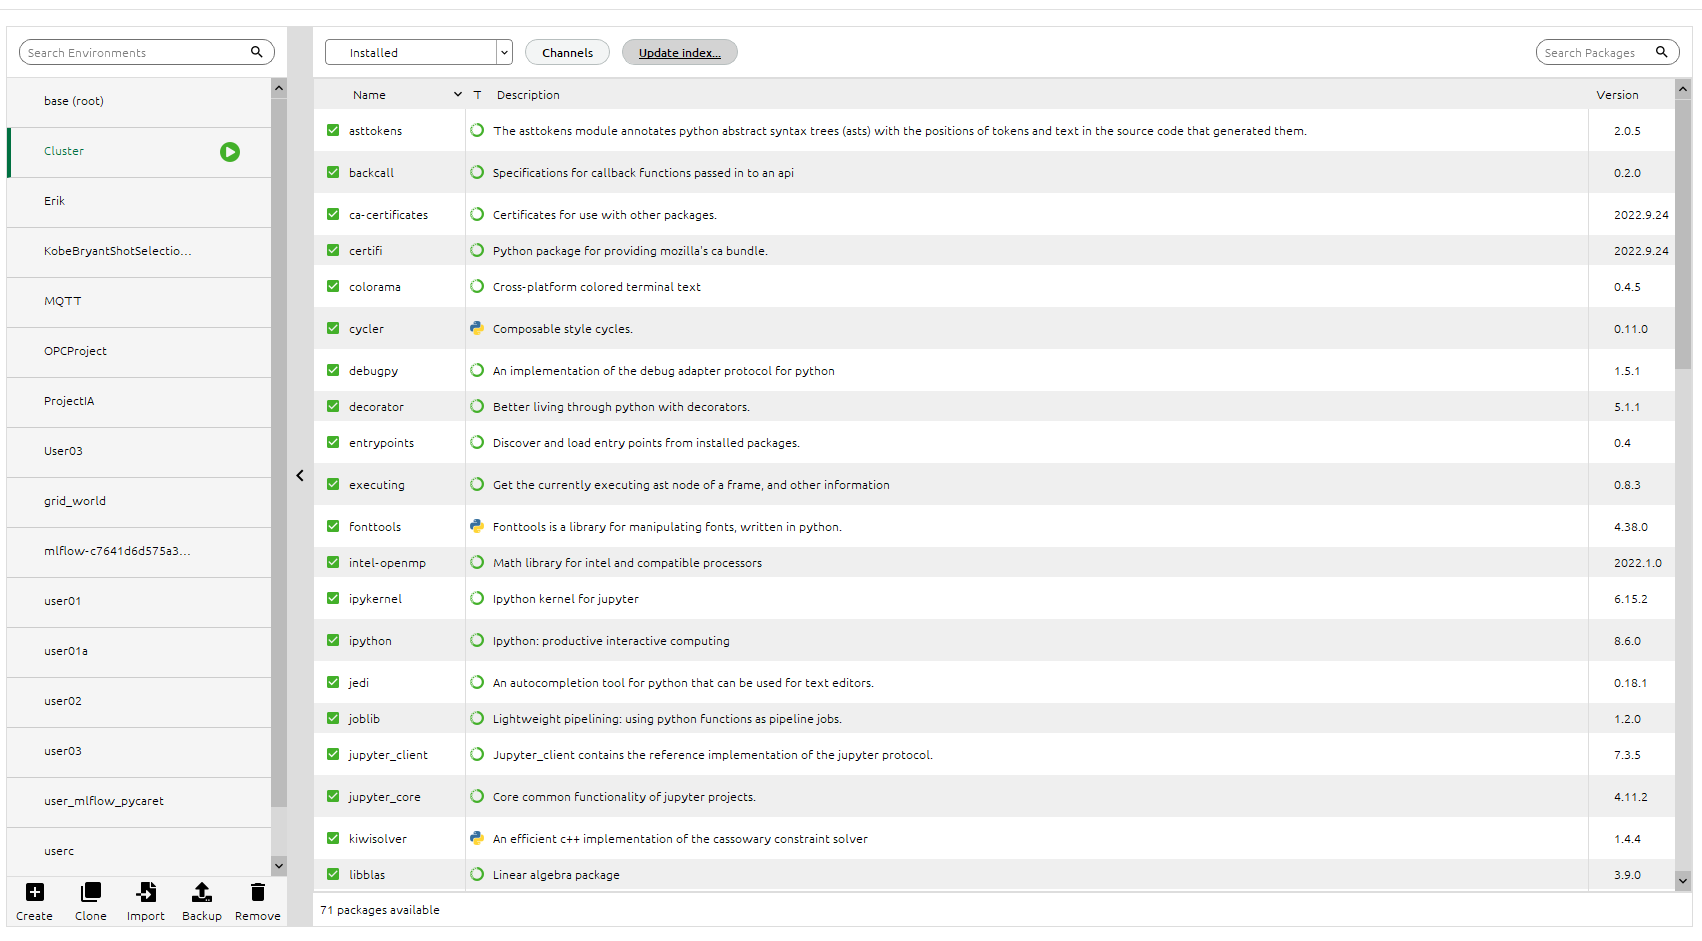

**Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).**

**Git: https://github.com/eriktavares/clustering** </br>

##  <span style="color:purple">Escolha de base de dados</span>

**1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data**

Base de dados na pasta ../Data/raw/Country-data.csv e data-dictionary.csv

**2. Quantos países existem no dataset?**

In [5]:
import pandas as pd
df=pd.read_csv('../Data/raw/Country-data.csv')
df['country'].describe()

count             167
unique            167
top       Afghanistan
freq                1
Name: country, dtype: object

Existem 167 países no dataset, conforme o describre. O count conta que existem 167 linhas e o unique mostra que existem 167 paises, sendo 1 diferente para cada linha.

**3.Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?**

Dimensões 167 Linhas e 10 Colunas

In [6]:
df.shape

(167, 10)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [8]:
df_index=df.set_index('country', inplace=True)
df.index.names = [None]
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


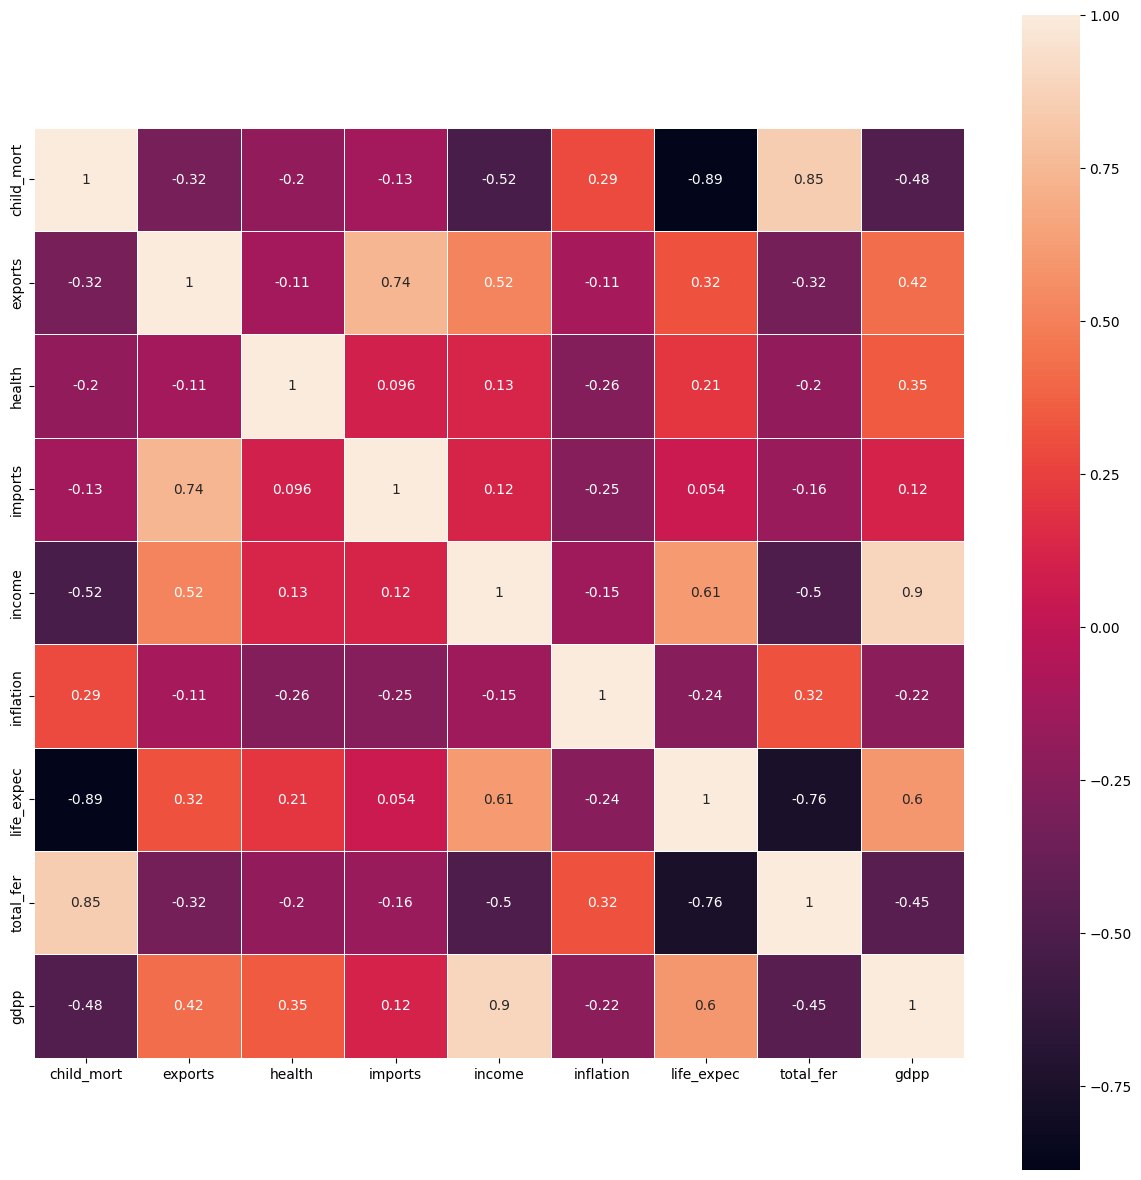

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, square=True, linewidths=.5, annot=True);

**4.Realize o pré-processamento adequado dos dados**

**4.1 Dados Nulos**

Os dataset não possui dados nulos conforme a visualização abaixo

In [10]:
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**4.2 - Outliears**

Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis (ver figura 1, onde o eixo horizontal representa a variável). O box plot tem uma reta (whisker ou fio de bigode) que estende–se verticalmente ou horizontalmente a partir da caixa, indicando a variabilidade fora do quartil superior e do quartil inferior.[1] Os valores atípicos ou outliers (valores discrepantes) podem ser plotados como pontos individuais [https://pt.wikipedia.org/wiki/Diagrama_de_caixa]

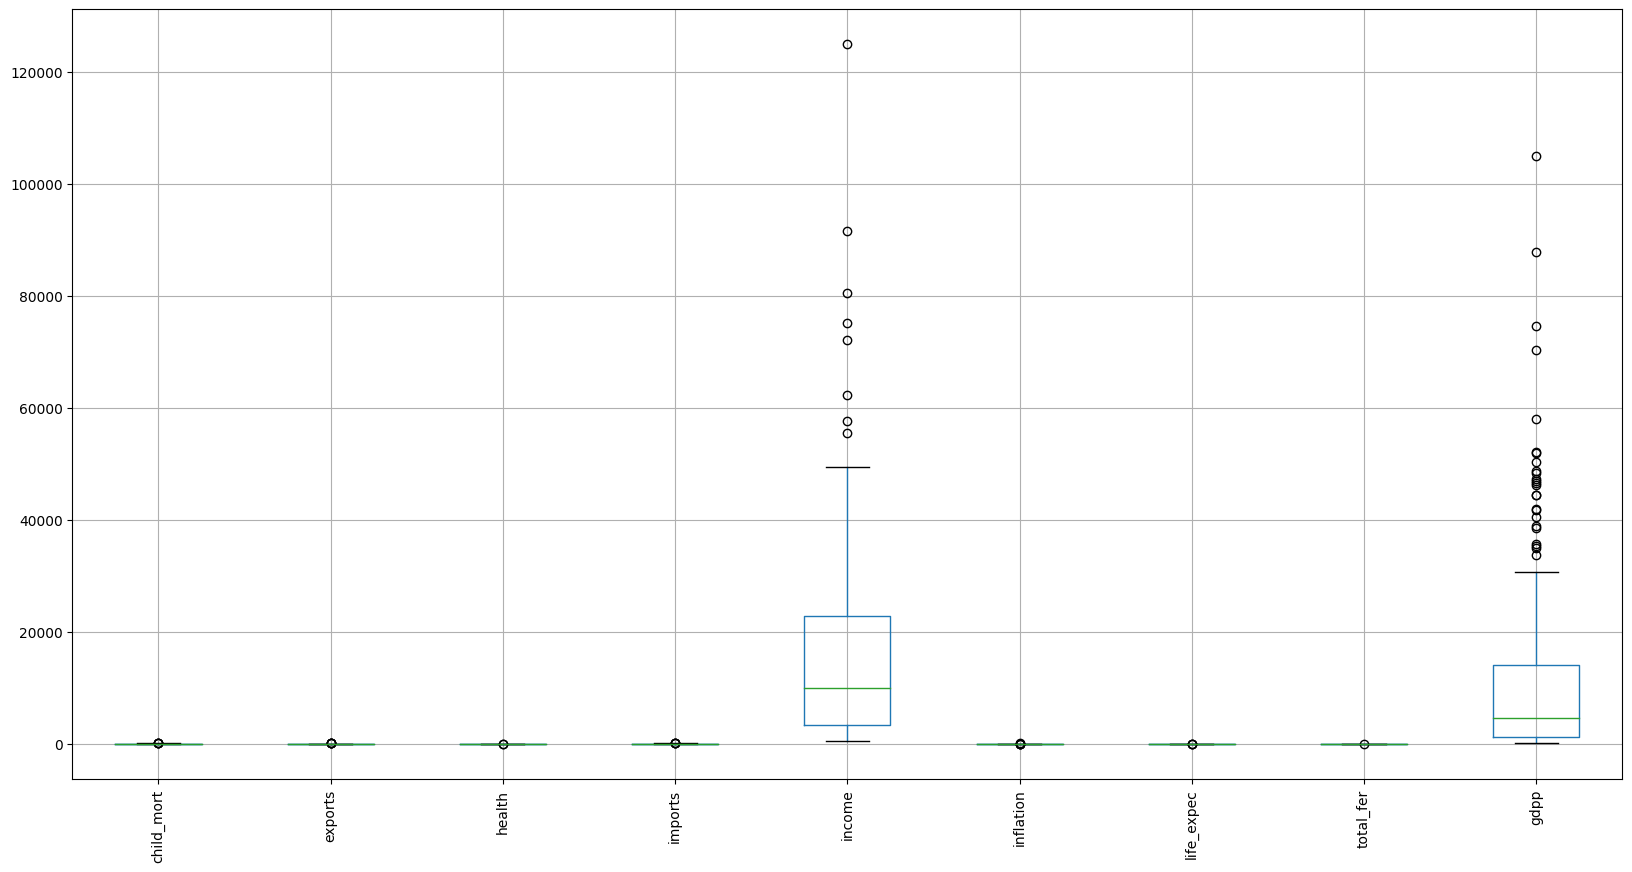

In [11]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
#df_features=df.drop()
 
fig = plt.figure(figsize =(20, 10))
# Creating plot
df.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

In [12]:
df[df['income']>50000].sort_values('income', ascending=False)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000
Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


In [13]:
df[df['gdpp']>30000].sort_values('gdpp', ascending=False)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


**Tratamento**

Esses valores que estão acima do limite superior do Box podem ser outliers, ou as vezes podem ser resultados de uma razão, onde o denominador seja muito pequeno e cause o resultado muito grande. Por exemplo, Luxembourg, pode ter uma renda alta, e uma população muito pequena, dessa forma, sua renda per capita pode ficar extremamente alta.
Uma forma talvez de limitar que o impacto de uma feature com valores bem acima do limite superior, possa ser, definir o limite superior para esta feature. Assim esse pais tem uma renda muito alta, vai continuar com essa renda muito alta, mas com limite do impacto em relação ao cluster.

**4.3 Normalização**

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
df_t1=scaler.transform(df)
df_t1

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

##  <span style="color:purple">Clusterização</span>

Para os dados pré-processados da etapa anterior você irá:

**1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:** </br></br></br>
**A. K-Médias**


In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_t1)
clusters=pd.DataFrame(kmeans.labels_, columns=['Clusters'])
df_cl=pd.concat([df.reset_index().rename(columns={'index': 'country'}), clusters], axis=1)
df_cl.set_index('country')
df_cl.index.names = [None]
df_cl

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [16]:
df_cl['Clusters'].value_counts(normalize=True)

1    0.514970
0    0.275449
2    0.209581
Name: Clusters, dtype: float64

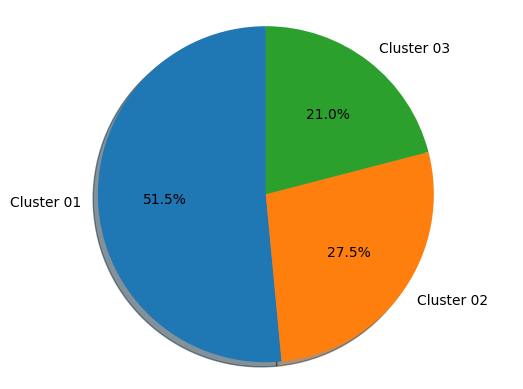

In [17]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Cluster 01', 'Cluster 02', 'Cluster 03'
sizes = df_cl['Clusters'].value_counts(normalize=True)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 2. Para os resultados, do K-Médias:** </br>
  **A.Interprete cada um dos clusters obtidos citando:</br>**
      **I.Qual a distribuição das dimensões em cada grupo</br>**


In [18]:
df_cl.groupby('Clusters').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,,,,,,,,,
0,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
1,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698
2,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857


In [19]:
df_cl.groupby('Clusters').describe()

child_mort                                                      \
              count       mean        std   min     25%    50%      75%   
Clusters                                                                  
0              46.0  93.284783  34.079410  28.1  64.625  90.25  111.000   
1              86.0  22.425581  14.459934   4.5  11.550  18.35   29.175   
2              35.0   4.897143   2.130795   2.6   3.500   4.20    5.400   

                exports             ... total_fer        gdpp                \
            max   count       mean  ...       75%   max count          mean   
Clusters                            ...                                       
0         208.0    46.0  29.287174  ...    5.6725  7.49  46.0   1695.913043   
1          64.4    86.0  40.382430  ...    2.6575  4.34  86.0   6719.790698   
2          10.8    35.0  58.431429  ...    1.9400  3.03  35.0  43117.142857   

                                                                      
                   std      min      25%      50%      75%       max  
Clusters                                                              
0          2795.655748    231.0    548.5    833.0   1310.0   17100.0  
1          5160.729689    592.0   2975.0   5050.0   9070.0   28000.0  
2         18891.773587  16600.0  30750.0  41800.0  48550.0  105000.0  

[3 rows x 72 columns]

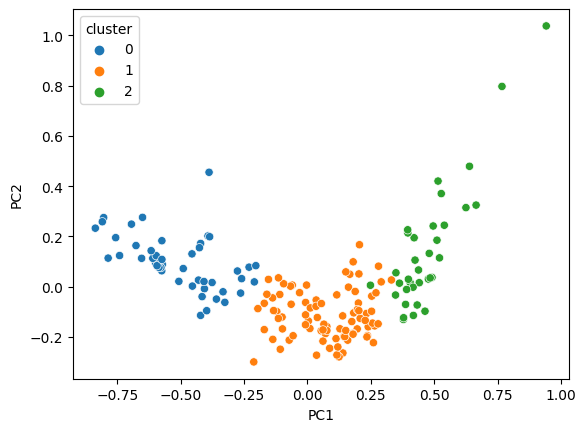

In [20]:
def plot_cluster_points(df, kmeans):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(kmeans.labels_)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data)
plot_cluster_points(df_t1, kmeans)

<Figure size 3000x2000 with 0 Axes>

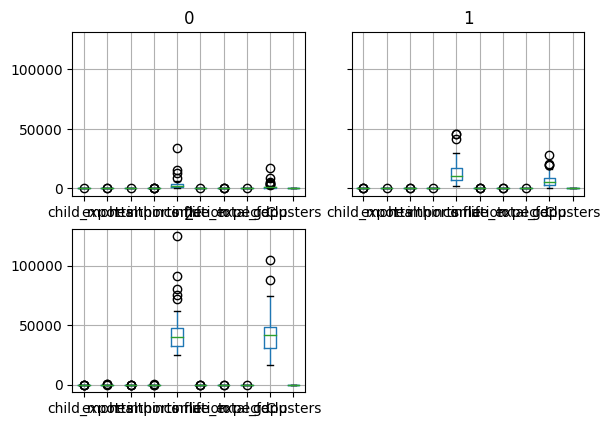

In [21]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
#df_features=df.drop()
 
fig = plt.figure(figsize =(30, 20))
# Creating plot
df_cl.groupby('Clusters').boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

###   II. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

Para identificar o pais que melhor representa o cluster, pode ser utilizado o atribulto kmeans.cluster_centers_ para determinar os centroides dos clusters, e assim calcular
a distância de cada ponto até os centroides.

In [22]:
from operator import index
from scipy.spatial import distance_matrix

df_cc=pd.DataFrame(kmeans.cluster_centers_, columns=df.keys())


dist_mat = pd.DataFrame(distance_matrix(df_t1, df_cc))
dist_mat.set_index(df.index)
df_results=pd.concat([df_cl, dist_mat], axis=1)
df_results

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters,0,1,2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0.183707,0.751634,1.083381
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0.744504,0.151057,0.526185
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0.608404,0.215062,0.618449
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0.358283,0.855939,1.173315
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0.741312,0.158637,0.424895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,0.433769,0.297234,0.726423
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,0.747628,0.416410,0.666594
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0.725412,0.273828,0.595665
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0.285602,0.467720,0.854744


In [23]:
df_cl.groupby('Clusters').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,,,,,,,,,
0,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
1,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698
2,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857


**Cluster 0**

Interpretação:

Paises com Alta mortalidade infantil (média = 93.28), Baixa exportação, baixos gastos com saúde, baixa importação, baixa renda, inflação alta, baixa espectativa de vida, 
filhos por mulher alto, e baixa renda per capita. Esse cluster fica no extremo com os piores indices para cada categória, então os países que fazem parte dele possuem os piores indicadores dos 10 que estão sendo informados, somente gasto com saúde ficou com média maior que o cluster um e muito próximo também. Porém gasto com saúde não é um indicador que garante a saúde, outros indicadores medem melhor a saúde, como espectativa de vida e mortalidade infantil.

Pais que mais representa o cluster: **Guinea**

**Cluster 1**

Paises médios, com indicadores melhores que o cluster 0 e menores que o cluster 2 em todos os quésitos, menor gasto com saúde que na média esse cluster ficou menor que os demais clusters.

Pais que mais representa o cluster: **Suriname**


**Cluster 2**

Melhores indicadores em todos os 10 quésitos.

Pais que mais representa o cluster: **Iceland**



Atenção: Melhor representação do cluster obtida pela distância do pais até o centroide.

In [24]:
df_results[['country','Clusters', 0]][df_results['Clusters']==0].sort_values(0, ascending=True).head(5)

,country,Clusters,0
63,Guinea,0,0.132923
94,Malawi,0,0.144783
106,Mozambique,0,0.154333
147,Tanzania,0,0.156570
150,Togo,0,0.168420


In [25]:
df_results[['country','Clusters', 1]][df_results['Clusters']==1].sort_values(1, ascending=True).head(5)

,country,Clusters,1
143,Suriname,1,0.110748
48,El Salvador,1,0.113461
61,Grenada,1,0.119334
76,Jamaica,1,0.121493
152,Tunisia,1,0.124526


In [26]:
df_results[['country','Clusters', 2]][df_results['Clusters']==2].sort_values(2, ascending=True).head(5)

,country,Clusters,2
68,Iceland,2,0.119836
144,Sweden,2,0.140653
53,Finland,2,0.143008
8,Austria,2,0.150823
15,Belgium,2,0.200318


**B. Clusterização Hierárquica**

O clustering hierárquico, como o nome sugere, é um algoritmo que constrói a hierarquia de clusters. Esse algoritmo começa com todos os pontos de dados atribuídos a um cluster próprio. Em seguida, dois clusters mais próximos são mesclados no mesmo cluster.

In [27]:
def plot_dendrogram(model, sch, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

Text(0, 0.5, 'Euclidean Distance')

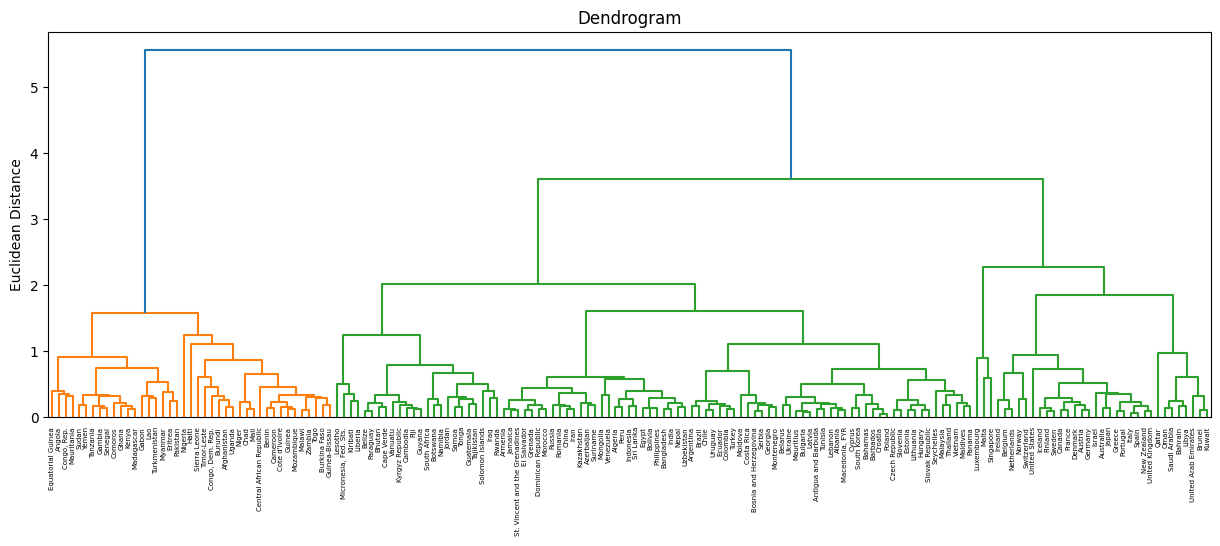

In [28]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df_t1, method='ward'), labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

2    0.550898
1    0.245509
0    0.203593
Name: Clusters_hc, dtype: float64

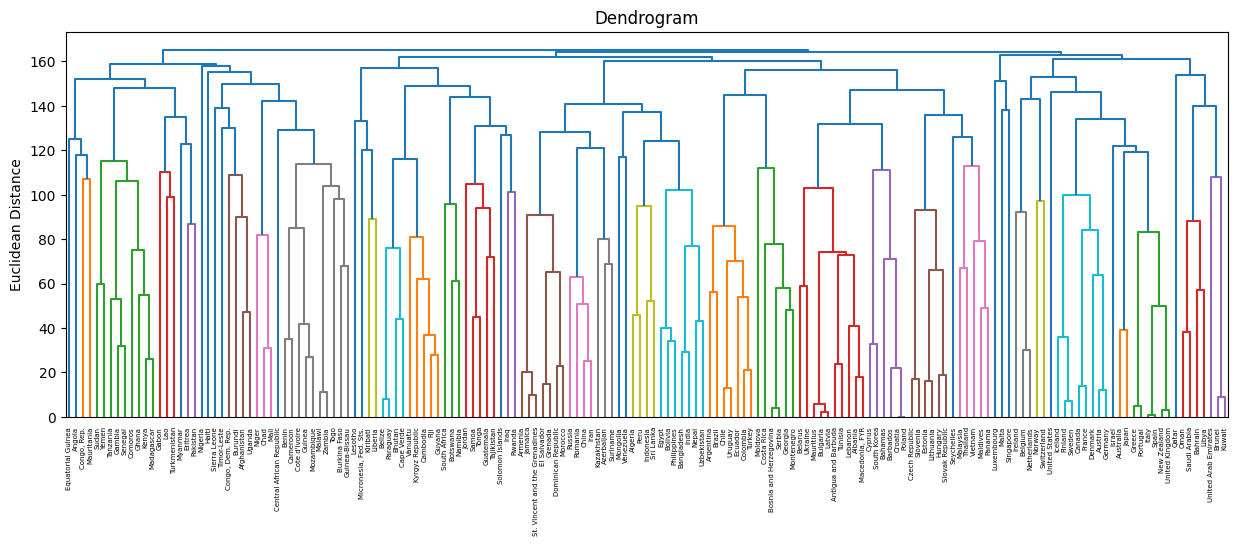

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = "euclidean",
                             linkage = 'ward', compute_distances=True).fit(df_t1)
hc_pred = hc.labels_

plt.figure(figsize=(15, 5))
plt.grid(False)
plot_dendrogram(hc, sch, labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')


df_results2=df.copy()
df_results2['Clusters_hc']=hc_pred
df_results2['Clusters_hc'].value_counts(normalize=True)

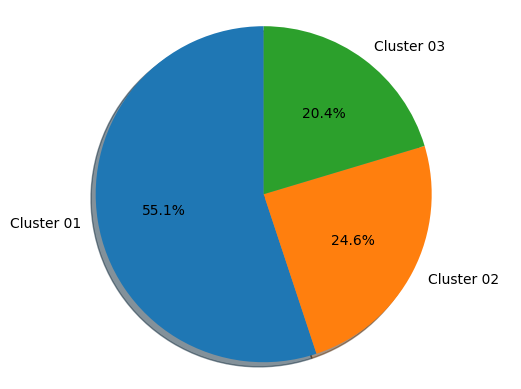

In [30]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Cluster 01', 'Cluster 02', 'Cluster 03'
sizes = df_results2['Clusters_hc'].value_counts(normalize=True)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [31]:
df_results2.groupby('Clusters_hc').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters_hc,,,,,,,,,
0,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235
1,97.102439,29.349244,5.551220,37.969900,3569.097561,12.807195,59.675610,5.129756,1680.731707
2,23.991304,39.919348,6.756304,50.121739,11943.804348,6.897217,71.920652,2.367174,6829.391304


Observando os resultados da clusterização hierarquica, o cluster 01 é o Cluster com os piores indicadores, o cluster 2 é o com resultados médios e o Cluster 0 é o com melhores indicadores.

### Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

Observando o gráfico com os tamanhos dos clusters é possível identificar pequenas variações nos tamanhos dos clusters.

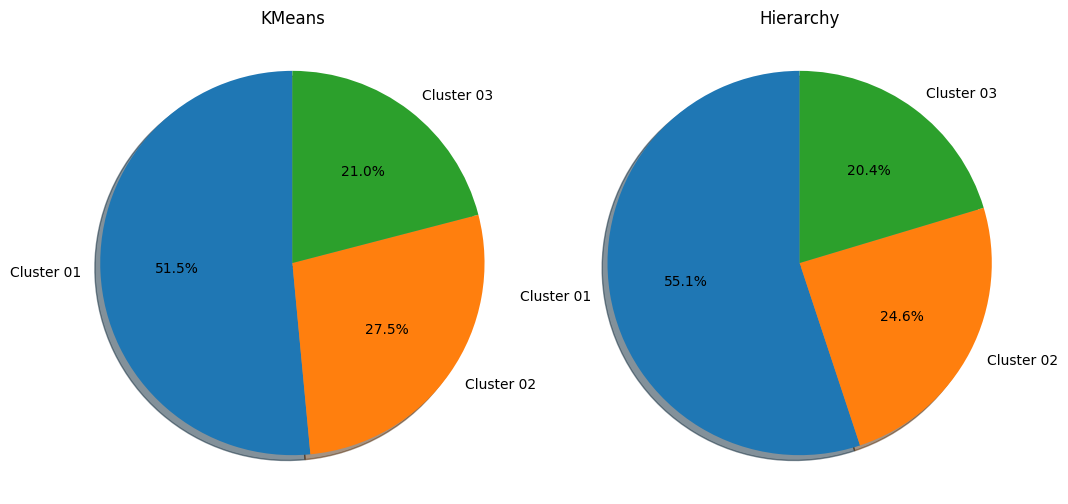

In [32]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                    figsize=(12, 6))


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Cluster 01', 'Cluster 02', 'Cluster 03'
sizes0 = df_results['Clusters'].value_counts(normalize=True)
sizes1 = df_results2['Clusters_hc'].value_counts(normalize=True)
#fig1, ax1 = plt.subplots()
ax0.set_title('KMeans')
ax0.pie(sizes0, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax0.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('Hierarchy')
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Semelhanças e Diferenças

Os clusters ficaram com nomes diferentes em cada algoritmo.

No kmeans o Cluster 0 - Piores indicadores, 1 Indicadores Médios, 2 - Melhores indicadores
No Hierarchy o Cluster 1 - Piores indicadores, o 2 Indicadores Médios, 0 - Melhores indicadores

In [60]:
dict= {1: 0, 2: 1, 0: 2}
df_results['Clusters_hc']=df_results2.reset_index(drop=True)['Clusters_hc'].replace(dict)

As semelhanças foram em 149 dos 167 paises, o que representa 89% dos paises.

In [61]:
se= df_results[df_results['Clusters']==df_results['Clusters_hc']]
se

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters,0,1,2,Clusters_hc
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0.183707,0.751634,1.083381,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0.744504,0.151057,0.526185,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0.608404,0.215062,0.618449,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0.358283,0.855939,1.173315,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0.741312,0.158637,0.424895,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,0.433769,0.297234,0.726423,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,0.747628,0.416410,0.666594,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0.725412,0.273828,0.595665,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0.285602,0.467720,0.854744,0


Os valores de exports, income, life_expec, total_fer e gdpp ficarm com médias muito próximas em relação aos dois algoritmos.
o health, child_mort, imports, inflation tiveram maiores diferenças.

In [62]:
df_results.groupby('Clusters').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0,1,2,Clusters_hc
Clusters,,,,,,,,,,,,,
0,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043,0.328353,0.699293,1.032569,0.152174
1,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698,0.674544,0.258311,0.574564,1.023256
2,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857,1.055641,0.626668,0.369437,1.857143


In [63]:
df_results.groupby('Clusters_hc').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters,0,1,2
Clusters_hc,,,,,,,,,,,,,
0,97.102439,29.349244,5.551220,37.969900,3569.097561,12.807195,59.675610,5.129756,1680.731707,0.048780,0.323030,0.709894,1.051177
1,23.991304,39.919348,6.756304,50.121739,11943.804348,6.897217,71.920652,2.367174,6829.391304,0.978261,0.666692,0.279419,0.580843
2,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235,1.882353,1.043605,0.632453,0.391328


Os 18 casos abaixo, houve diferença na do kmeans para o HC. Alguns até no proprio KMeans estavam com diferença pequena entre dois Clusters, como Bahrain (Cluster 1 e 2 com distância próxima). Outros não, como Cyprus.



In [64]:
di= df_results[df_results['Clusters']!=df_results['Clusters_hc']]
di

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters,0,1,2,Clusters_hc
11,Bahrain,8.6,69.500,4.97,50.9000,41100,7.440,76.0,2.16,20700,1,0.816417,0.326991,0.352471,2
42,Cyprus,3.6,50.200,5.97,57.5000,33900,2.010,79.9,1.42,30800,2,0.923593,0.372688,0.249183,1
43,Czech Republic,3.4,66.000,7.88,62.9000,28300,-1.430,77.5,1.51,19800,2,0.882455,0.327036,0.291322,1
72,Iraq,36.9,39.400,8.41,34.1000,12700,16.600,67.2,4.56,4500,0,0.368631,0.418910,0.729259,1
81,Kiribati,62.7,13.300,11.30,79.9000,1730,1.520,60.7,3.84,1490,0,0.466104,0.566188,0.848793,1
87,Lesotho,99.7,39.400,11.10,101.0000,2380,4.150,46.5,3.30,1170,0,0.592515,0.794369,1.052291,1
88,Liberia,89.3,19.100,11.80,92.6000,700,5.470,60.8,5.02,327,0,0.451511,0.747830,1.004523,1
89,Libya,16.6,65.600,3.88,42.1000,29600,14.200,76.1,2.41,12100,1,0.732998,0.261469,0.489415,2
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988,1,0.615520,0.496229,0.895718,0
108,Namibia,56.0,47.800,6.78,60.7000,8460,3.560,58.6,3.60,5190,0,0.341614,0.396167,0.758069,1


### Escolha de algoritmos

**1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.**

O kmeans possui dois tipos de ínicialização 'k-means++' e 'random'

'k-means++' : seleciona os centróides iniciais do cluster usando amostragem baseada em uma distribuição de probabilidade empírica da contribuição dos pontos para a inércia geral. Esta técnica acelera a convergência e está teoricamente comprovada como-ótimo. Veja a descrição de n_initpara mais detalhes.

'Random' : Escolhe de forma pseudo-aleatória.


1. Definição dos centróides (k-means++ ou Random).
2. Cálculo das distancias entre pontos e centroides.
3. Associa os pontos aos clusters correspondentes.
4. Cálcula a média dos pontos associados ao centróides.
5. Reajusta o centróides para o centro do cluster.
6. Repete o processo a partir do 2.
7. Para o processo por uma tolerância de variáção do centroides no passo 5, ou número máximo de interações.

**2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.**


In [67]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(df_t1)
df_results['Medoides']=kmedoids.labels_

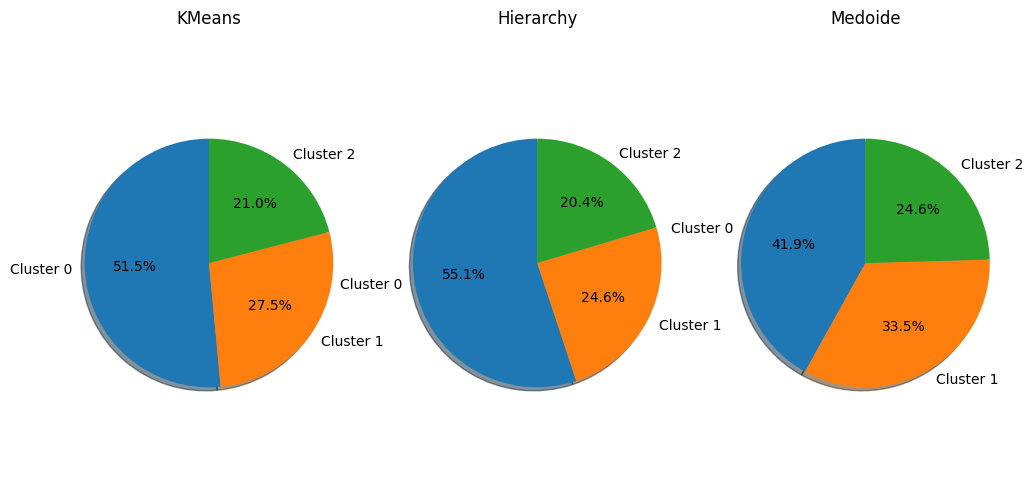

In [68]:
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 6))



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Cluster 0', 'Cluster 1', 'Cluster 2'
sizes0 = df_results['Clusters'].value_counts(normalize=True)
sizes1 = df_results['Clusters_hc'].value_counts(normalize=True)
sizes2 = df_results['Medoides'].value_counts(normalize=True)
#fig1, ax1 = plt.subplots()
ax0.set_title('KMeans')
ax0.pie(sizes0, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax0.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Hierarchy')
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.set_title('Medoide')
ax2.pie(sizes2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Com a inclusão do Medoide do sklearn, o Cluster 0 ficou menor, e o Cluster 1 ficou maior, assim como o cluster 2. Diferença maior que o Kmeans e o Hierarchy. O Kmeans parece ter ficado como intermediário entre Hierarchy e medoide.

In [69]:
dict= {1: 0, 2: 1, 0: 2}
df_results['Medoides']=df_results['Medoides'].replace(dict)
df_results['Alg2']='Medoide'
df_grupo_med=df_results.groupby(['Medoides', 'Alg2']).mean()
df_grupo_med

,,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters,0,1,2,Clusters_hc
Medoides,Alg2,,,,,,,,,,,,,,
0,Medoide,98.256098,28.341707,6.147805,41.134146,3246.902439,12.653049,59.026829,5.238049,1570.780488,0.000000,0.320267,0.730342,1.062622,0.073171
1,Medoide,27.974286,42.701271,5.813571,50.710941,10903.000000,8.336871,71.052857,2.576714,5254.885714,0.942857,0.626178,0.277557,0.629390,1.014286
2,Medoide,7.221429,48.466071,8.557321,46.328571,35121.964286,3.521607,78.375000,1.735357,30942.321429,1.607143,0.948198,0.481119,0.396718,1.535714


In [70]:
df_results['Alg0']='Kmeans'
df_results['Alg1']='Hierarchy'
df_grupo_km=df_results.groupby(['Clusters', 'Alg0']).mean()
df_grupo_hc=df_results.groupby(['Clusters_hc', 'Alg1']).mean()
df_grupo=pd.concat([df_grupo_km, df_grupo_med], axis=0)
df_grupo=pd.concat([df_grupo, df_grupo_hc], axis=0)
df_grupo_v=df_grupo[['child_mort',	'exports',	'health',	'imports',	'income',	'inflation',	'life_expec',	'total_fer',	'gdpp']]
df_grupo_v

,,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,Alg0,,,,,,,,,
0,Kmeans,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
1,Kmeans,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698
2,Kmeans,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857
0,Medoide,98.256098,28.341707,6.147805,41.134146,3246.902439,12.653049,59.026829,5.238049,1570.780488
1,Medoide,27.974286,42.701271,5.813571,50.710941,10903.000000,8.336871,71.052857,2.576714,5254.885714
2,Medoide,7.221429,48.466071,8.557321,46.328571,35121.964286,3.521607,78.375000,1.735357,30942.321429
0,Hierarchy,97.102439,29.349244,5.551220,37.969900,3569.097561,12.807195,59.675610,5.129756,1680.731707
1,Hierarchy,23.991304,39.919348,6.756304,50.121739,11943.804348,6.897217,71.920652,2.367174,6829.391304
2,Hierarchy,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235


**3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.**

É sensível a outliears, porque os centroides são ajustados pelas distãncia dos pontos até os centróides, os outliears podem deslocar os centróides porque eles teriam uma influência
por gerar distãncia maiores até o centróides. As vezes pode ser uma feature com valor muito alto e com isso influênciar a distãncia do ponto ao centroide, e consequentemente na média e no ajuste do centroide.

**4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?**

O DBScan é um algoritmo baseado em densidade. Dado um conjunto de pontos em algum espaço, ele agrupa pontos que estão próximos (pontos com muitos vizinhos próximos ), marcando como outliers pontos que estão sozinhos em regiões de baixa densidade (cujos vizinhos mais próximos estão muito distantes). 

O algoritmo trabalha com o conceito de Acessibilidade de Conectividade. Um ponto é acessivel de um outro ponto se tem uma distância menor ou igual a um valor epsilon. A conectividade é um ponto que que está conectável a outro ponto que seja acessível através de um ponto acessivel do primeiro ponto. Ou seja A e B são acessíveis, B e C são acessiveis, então A e C são conectaveis.

Os pontos são então classificados como core, quando possuem um número minimo de vizinhos, dentro do raio epsilon. Os pontos conectaveis a partir dos pontos core, são pontos acessíveis.

O pontos são rotulados como core (minimo de vizinhos), e os demais são rotulados como ruído. O pontos core são propagados através dos pontos acessíveis. Dessa forma os pontos isolados acabam ficando de fora do cluster e não tendo nenhuma influência sobre eles. Os pontos isolados não vão ter pontos dentro do radio de distância epsilon e não serão acessíveis a partir dos pontos core.



Exemplo: Ponto A é um ponto core, possui 3 pontos dentro do raio epsilon.
B e C são pontos acessíveis e perterncem ao mesmo cluster.
O ponto N não é acessível e nem possui pontos dentro do raio epsilon. N não influência em nada no cluster de A, porque se N não existisse o cluster
de A seria definido da mesmo forma.

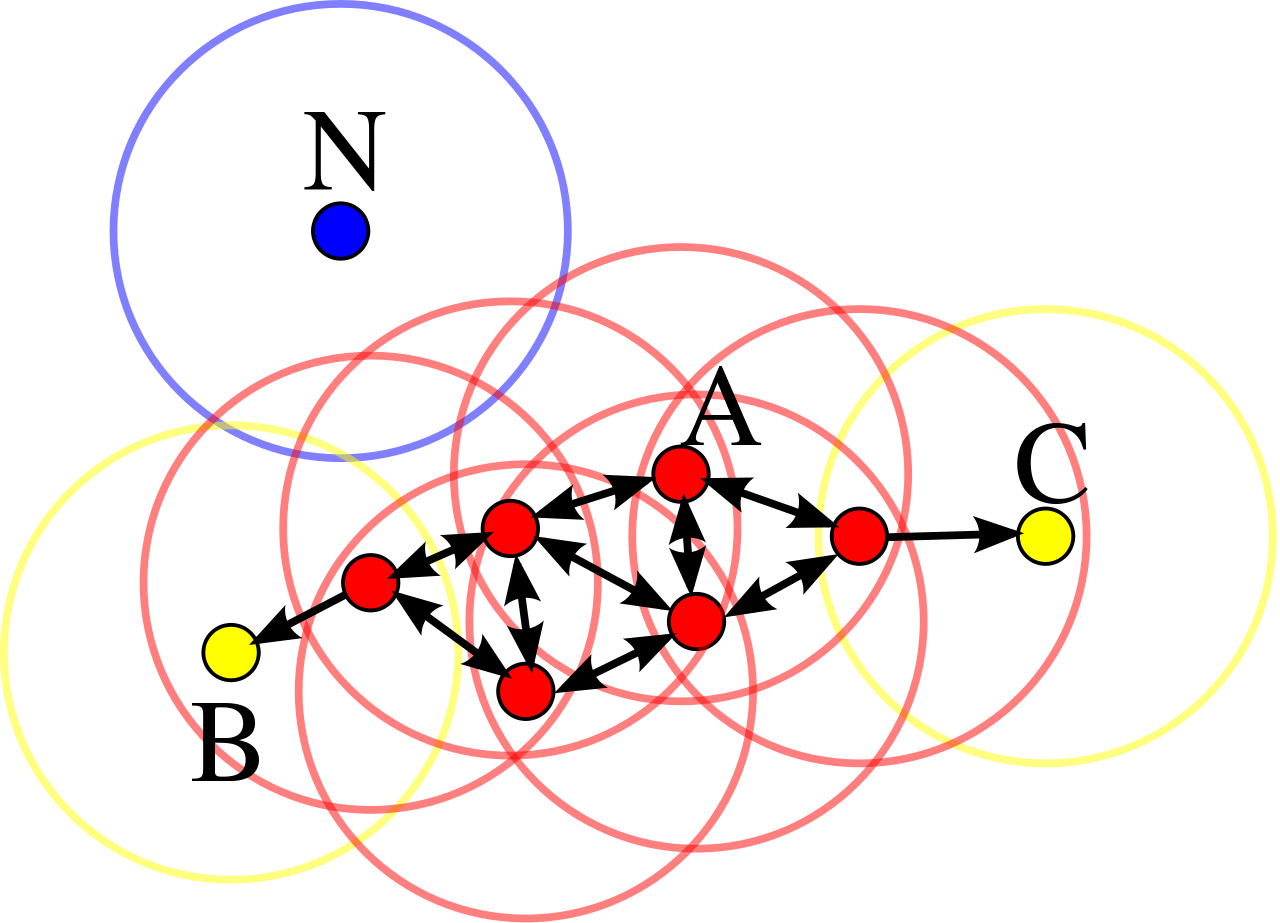